# get model variables

## simple version

In [32]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the XML file
tree = ET.parse('fed model/pyfrbus/models/model.xml')
root = tree.getroot()

# Extract data
data = []
for variable in root.findall('variable'):
    var_data = {}
    var_data['name'] = variable.find('name').text
    var_data['equation_type'] = variable.find('equation_type').text
    var_data['sector'] = variable.find('sector').text if variable.find('sector') is not None else None
    var_data['definition'] = variable.find('definition').text
    var_data['description'] = variable.find('description').text if variable.find('description') is not None else None
    var_data['eviews_equation'] = variable.find('standard_equation/eviews_equation').text if variable.find('standard_equation/eviews_equation') is not None else None
    var_data['python_equation'] = variable.find('standard_equation/python_equation').text if variable.find('standard_equation/python_equation') is not None else None
    var_data['rhs_eq_vars'] = [var.text for var in variable.findall('standard_equation/rhs_eq_var')] if variable.find('standard_equation/rhs_eq_var') is not None else []
    var_data['exogenous_projection'] = variable.find('exogenous_projection').text if variable.find('exogenous_projection') is not None else None
    data.append(var_data)

# Convert to DataFrame
model_variables_simple = pd.DataFrame(data)

# Display the DataFrame
# model_variables.to_csv('model_variables.csv')
model_variables_simple

,name,equation_type,sector,definition,description,eviews_equation,python_equation,rhs_eq_vars,exogenous_projection
0,dmptmax,Behavioral,Financial Sector,Monetary policy indicator for both thresholds,DMPTMAX equals one when either the unemploymen...,dmptmax - dmptmax_aerr = (@recode((dmptlur)>(d...,"dmptmax - dmptmax_aerr = (max((dmptlur),(dmptp...","[dmptlur, dmptpi]",None
1,adjlegrt,Exogenous,None,Potential government employment ratio (relativ...,None,None,None,[],2
2,d79a,Exogenous,None,"Dummy, post-1979 indicator",None,None,None,[],2
3,d8095,Exogenous,None,"Dummy, 1980-1995 indicator",None,None,None,[],2
4,d83,Exogenous,None,"Dummy, post-1983 indicator",None,None,None,[],2
...,...,...,...,...,...,...,...,...,...
362,zyhpst,Behavioral,Expectations,Expected trend share of property income in hou...,None,log(zyhpst)-zyhpst_aerr = log(zyhpst(-1)) + y_...,log(zyhpst)-zyhpst_aerr = log(zyhpst(-1)) + y_...,"[yhpgap, zyhpst]",None
363,zyhst,Behavioral,Expectations,Expected trend ratio of household income to GDP,None,log(zyhst) - zyhst_aerr = log(zyhst(-1)) + y_z...,log(zyhst) - zyhst_aerr = log(zyhst(-1)) + y_z...,"[yhgap, zyhst]",None
364,zyht,Identity,Expectations,"Expected level of real transfer income, for QE...",Permanent household transfer income (ZYHT) is ...,log(zyht) - zyht_aerr =\n y_zyht(1)...,log(zyht) - zyht_aerr =\n y_zyht_1*...,"[picnia, ptr, rff, rtr, xgap2, xgdpt, yhgap, y...",None
365,zyhtst,Behavioral,Expectations,Expected trend share of transfer income in hou...,None,log(zyhtst) - zyhtst_aerr = log(zyhtst(-1)) + ...,log(zyhtst) - zyhtst_aerr = log(zyhtst(-1)) + ...,"[yhtgap, zyhtst]",None


## full columns version

In [31]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the XML file
tree = ET.parse('fed model/pyfrbus/models/model.xml')
root = tree.getroot()

# Initialize a list to store data
data = []

# Function to extract all elements and their text recursively
def extract_elements(element, data_dict):
    for subelem in element:
        if len(subelem) == 0:  # Leaf node
            if subelem.tag not in data_dict:
                data_dict[subelem.tag] = subelem.text
            else:
                if not isinstance(data_dict[subelem.tag], list):
                    data_dict[subelem.tag] = [data_dict[subelem.tag]]
                data_dict[subelem.tag].append(subelem.text)
        else:  # Non-leaf node
            if subelem.tag not in data_dict:
                data_dict[subelem.tag] = {}
            extract_elements(subelem, data_dict[subelem.tag])
    return data_dict

# Extract data from each <variable> element
for variable in root.findall('variable'):
    var_data = extract_elements(variable, {})
    data.append(var_data)

# Convert list of dictionaries to DataFrame
df = pd.json_normalize(data, sep='_')

# Display the DataFrame
df.to_csv('model_var_all_cols.csv')
df

,name,equation_type,sector,definition,description,standard_equation_eviews_equation,standard_equation_python_equation,standard_equation_rhs_eq_var,exogenous_projection,standard_equation_coeff_cf_name,...,standard_equation_estimation_statistics_estimation_date,standard_equation_coeff_distributed_lag_group,standard_equation_estimation_statistics,mce_equation_mce_group,mce_equation_mce_description,mce_equation_eviews_equation,mce_equation_python_equation,mce_equation_coeff_cf_name,mce_equation_coeff_cf_value,mce_equation_rhs_eq_var
0,dmptmax,Behavioral,Financial Sector,Monetary policy indicator for both thresholds,DMPTMAX equals one when either the unemploymen...,dmptmax - dmptmax_aerr = (@recode((dmptlur)>(d...,"dmptmax - dmptmax_aerr = (max((dmptlur),(dmptp...","[dmptlur, dmptpi]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,adjlegrt,Exogenous,NaN,Potential government employment ratio (relativ...,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d79a,Exogenous,NaN,"Dummy, post-1979 indicator",NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d8095,Exogenous,NaN,"Dummy, 1980-1995 indicator",NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d83,Exogenous,NaN,"Dummy, post-1983 indicator",NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,zyhpst,Behavioral,Expectations,Expected trend share of property income in hou...,NaN,log(zyhpst)-zyhpst_aerr = log(zyhpst(-1)) + y_...,log(zyhpst)-zyhpst_aerr = log(zyhpst(-1)) + y_...,"[yhpgap, zyhpst]",NaN,y_zyhpst(1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,zyhst,Behavioral,Expectations,Expected trend ratio of household income to GDP,NaN,log(zyhst) - zyhst_aerr = log(zyhst(-1)) + y_z...,log(zyhst) - zyhst_aerr = log(zyhst(-1)) + y_z...,"[yhgap, zyhst]",NaN,y_zyhst(1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,zyht,Identity,Expectations,"Expected level of real transfer income, for QE...",Permanent household transfer income (ZYHT) is ...,log(zyht) - zyht_aerr =\n y_zyht(1)...,log(zyht) - zyht_aerr =\n y_zyht_1*...,"[picnia, ptr, rff, rtr, xgap2, xgdpt, yhgap, y...",NaN,"[y_zyht(1), y_zyht(2), y_zyht(3), y_zyht(4), y...",...,NaN,"[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, ...",NaN,mcother,Permanent household transfer income (ZYHT) is ...,zyht - zyht_aerr = (1 - (y_zyht(1)^.25)*exp(y_...,zyht - zyht_aerr = (1 - (y_zyht_1**.25)*exp(y_...,"[y_zyht(1), y_zyht(2)]","[0.750, 0.0075]","[yht, zyht]"
365,zyhtst,Behavioral,Expectations,Expected trend share of transfer income in hou...,NaN,log(zyhtst) - zyhtst_aerr = log(zyhtst(-1)) + ...,log(zyhtst) - zyhtst_aerr = log(zyhtst(-1)) + ...,"[yhtgap, zyhtst]",NaN,y_zyhtst(1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# plot results

In [1]:
import pandas as pd

# Load the baseline data from the provided text file
# Adjusting the separator to comma (',') since the data is comma-separated
baseline_df = pd.read_csv('./fed model/data_only_package/HISTDATA.TXT', sep=',', index_col=0)
baseline_df.columns = baseline_df.columns.str.lower()
baseline_df.index = pd.PeriodIndex(baseline_df.index, freq='Q')

baseline_df.head()

,adjlegrt,d79a,d8095,d83,d87,ddockm,ddockx,delrff,deuc,dfmprr,...,zrff10,zrff30,zrff5,zyh,zyhp,zyhpst,zyhst,zyht,zyhtst,zynid
OBS,,,,,,,,,,,,,,,,,,,,,
1968Q1,0.163252,0,0,0,0,1.000000,0.000000,0.606068,0,0,...,4.137284,3.926430,4.530140,3696.969930,1125.546522,0.307524,0.74056,267.950154,0.070122,0.009068
1968Q2,0.164130,0,0,0,0,1.000000,0.000000,1.202225,0,0,...,4.521569,4.132565,5.161410,3740.663143,1131.625640,0.305108,0.74056,278.428398,0.071780,0.006775
1968Q3,0.164992,0,0,0,0,1.037219,0.030411,-0.026595,0,0,...,5.156405,4.858850,5.674190,3778.374252,1133.141461,0.302727,0.74056,287.913809,0.073408,0.003778
1968Q4,0.165836,0,0,0,0,0.979824,-0.045147,-0.096275,0,0,...,5.199475,4.881883,5.750993,3806.256916,1130.102013,0.299885,0.74056,295.854443,0.075014,0.001772
1969Q1,0.166663,0,0,0,0,0.847572,-0.150132,0.678584,0,0,...,5.346321,4.960543,5.993586,3819.542953,1122.440153,0.297054,0.74056,304.347129,0.076704,0.001944


In [2]:
variables = pd.read_csv('model_variables_simple.csv')
variables[variables.name == 'xgdp'].definition

306    GDP, cw 2012$
Name: definition, dtype: object

In [3]:
import pandas as pd
foreign_const = pd.read_csv('foreign_const.csv', index_col=0)
foreign_const.index = pd.PeriodIndex(foreign_const.index, freq='Q')
foreign_const

,adjlegrt,d79a,d8095,d83,d87,ddockm,ddockx,delrff,deuc,dfmprr,...,zrff10_trac,zrff30_trac,zrff5_trac,zyh_trac,zyhp_trac,zyhpst_trac,zyhst_trac,zyht_trac,zyhtst_trac,zynid_trac
1968Q1,0.163252,0.0,0.0,0.0,0.0,1.000000,0.000000,0.606068,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1968Q2,0.164130,0.0,0.0,0.0,0.0,1.000000,0.000000,1.202225,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1968Q3,0.164992,0.0,0.0,0.0,0.0,1.037219,0.030411,-0.026595,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1968Q4,0.165836,0.0,0.0,0.0,0.0,0.979824,-0.045147,-0.096275,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1969Q1,0.166663,0.0,0.0,0.0,0.0,0.847572,-0.150132,0.678584,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022Q4,0.158209,1.0,0.0,1.0,1.0,1.000000,0.000000,1.448735,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023Q1,0.157765,1.0,0.0,1.0,1.0,1.000000,0.000000,0.872263,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023Q2,0.157322,1.0,0.0,1.0,1.0,1.000000,0.000000,0.465366,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023Q3,0.156878,1.0,0.0,1.0,1.0,1.000000,0.000000,0.275079,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot(baseline: pd.DataFrame, sim: pd.DataFrame, start: str, end: str,
         plots: list, variables: pd.DataFrame, file_name = 'plot.png', plot_title = 'US Economic Simulation'):
    # Pad with 25% history but not more than 6 or less than 2 qtrs
    back_pad = max(min(round((pd.Period(end) - pd.Period(start)).n / 4), 6), 2)
    plot_period = pd.period_range(pd.Period(start) - back_pad, end, freq="Q")
    
    num_plots = len(plots)
    num_rows = int(num_plots**0.5)
    num_cols = num_plots // num_rows + (num_plots % num_rows > 0)
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7, 7))
    axes = axes.flatten()  # Flatten the array in case of more than one row and column
    
    for i, plot in enumerate(plots):
        # print(i, plot)
        column = plot.get('column')
        type = plot.get('type', 'value')
        
        if column not in baseline.columns or column not in sim.columns:
            print(f"Column '{column}' does not exist in one of the DataFrames.")
            continue
        if type not in ['value', 'pct_change']:
            print(f"Invalid type '{type}'. Type must be either 'value' or 'pct_change'.")
            continue
        
        if type == 'pct_change':
            # print(variables[variables.name == column].definition.values[0])
            baseline_data = baseline[column].pct_change(4) * 100
            baseline_data = baseline_data[plot_period]
            sim_data = sim[column].pct_change(4) * 100
            sim_data = sim_data[plot_period]
            title = ('pct_change ' + variables[variables.name == column].definition.values[0]) if column in variables.name.values else column
        else:
            # print(variables[variables.name == column].definition.values[0])
            baseline_data = baseline.loc[plot_period, column]
            sim_data = sim.loc[plot_period, column]
            # Get the title of the plot from the 'variables' DataFrame
            title = (variables[variables.name == column].definition.values[0]) if column in variables.name.values else column
            
        # Convert the PeriodIndex to datetime
        baseline_data.index = baseline_data.index.strftime('%yQ%q')
        sim_data.index = sim_data.index.strftime('%yQ%q')
        
        # If the title is too long, set it to the column name
        if len(title) > 50:
            print(f"Title '{title}' is too long. Setting title to default.")
            title = 'pct_change ' + column if 'pct_change' in title else column
        
        axes[i].plot(baseline_data, label='Baseline')
        axes[i].plot(sim_data, label='Simulation', linestyle='--')
        axes[i].set_title(title)
        axes[i].legend()
        
        # Set xticks to only include one tick per year, up to a maximum of 12 ticks
        years = np.unique(baseline_data.index.str[:-2])  # Get the unique years
        if len(years) > 12:
            years = years[::len(years)//12]  # If there are more than 12 years, select years to have 12 evenly spaced ticks
        xticks = [np.where(baseline_data.index.str[:-2] == year)[0][0] for year in years]  # Get the index of the first occurrence of each year
        xticklabels = baseline_data.index[xticks]  # Get the corresponding labels
        axes[i].set_xticks(xticks)
        axes[i].set_xticklabels(xticklabels, rotation=45)
        
        # Show the xgrid
        axes[i].xaxis.grid(True)

    fig.suptitle(plot_title)
    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()


Title 'pct_change Price index for personal consumption expendits ex. food and energy, cw (NIPA definit' is too long. Setting title to default.


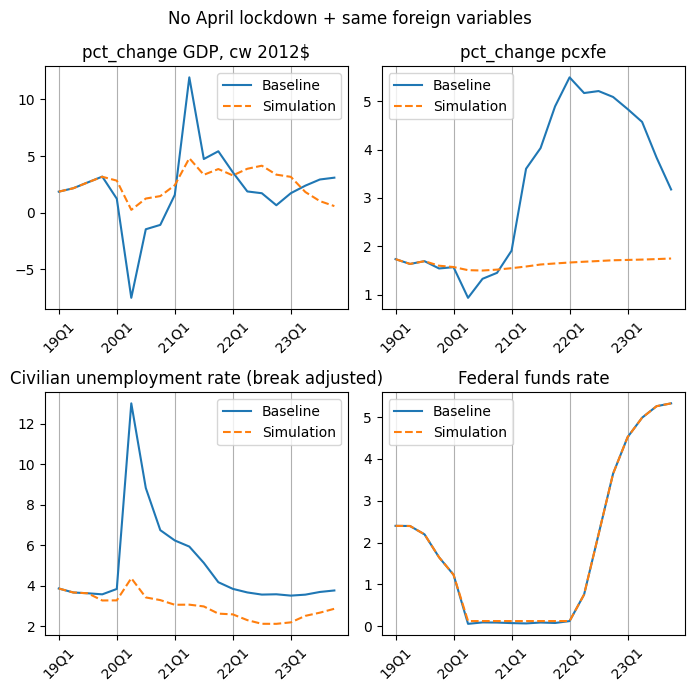

In [60]:
variables = pd.read_csv('model_variables_simple.csv')
plots = [{'column': 'xgdp', 'type': 'pct_change'}, {'column': 'pcxfe', 'type': 'pct_change'}, {'column': 'lur'}, {'column': 'rff'}]
plot(baseline_df, foreign_const, '2020Q1', '2023Q4', plots, variables, 'plot.png', plot_title='No April lockdown + same foreign variables')